Reddit Metrics
Cryptos are associated with their reddit pages. It's where crypto investors come to discuss the merits of different blockchain implementations, dissect the day's main talking points. 
We can combine reddit metrics (total number of subscribers, new subscribers, rank -literally scraped from the redditmetrics website) and other crypto data.
For now, I am will take a look at iota and eos; two coins that emerged in June 2017 and experienced strong growth towards the end of 2017. Their corresponding subreddits are r/iota and r/eos, respectively.

In [10]:
def extract_reddit_metrics(subreddit, metric, col_label="", sub_col=False):

        """Retrieve daily subscriber data for a specific subreddit scraped from redditmetrics.com

        

        Parameters

        ----------

        subreddit : the name of subreddit (e.g. "python", "learnpython")

        metric : the particular subscriber information to be retrieved

            (options are limited to "subscriber-growth" (daily change), 

            'total-subscribers' (total subscribers on a given day) and 

            'rankData' (the position of the subreddit on reddit overall)

            'subscriber-growth-perc' (daily percentage change in subscribers))

        col_label : specify the title of the value column

            (it will default to the metric name with hyphens replacing underscores)

        sub_col : whether to include the subreddit name as a column

            (default is False i.e. the column is not included)

            

        Returns

        -------

        pandas Dataframe

        """
        from_date="2017-04-27"
        to_date="2018-04-27"
        if metric not in ['subscriber-growth', 'total-subscribers', 'rankData', 'subscriber-growth-perc']:

            raise ValueError(

                "Invalid metric: must be one of 'subscriber-growth', " + 

                "'total-subscribers', 'subscriber-growth-perc', 'rankData'")

        url = "http://redditmetrics.com/r/" + subreddit
        print(url)
        if metric == 'subscriber-growth-perc':

            metric_name = 'total-subscribers'

        else:

            metric_name = metric

        try: 

            parsed_page = urlopen(url, timeout=20).read()

            parsed_page = parsed_page.decode("utf8")

        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        if metric == 'rankData':

            start_segment = parsed_page.find(metric)

        else:

            start_segment = parsed_page.find("element: '"+metric_name+"'")

        if start_segment != -1:

            start_list = parsed_page.find("[", start_segment)

            end_list = parsed_page.find("]", start_list)

            parsed_page = parsed_page[start_list:end_list + 1]

        else:

            return pd.DataFrame({"error":"Could not find that subreddit"}, index=[0])

        parsed_page = parsed_page.replace("'", '"')

        parsed_page = parsed_page.replace('a', '\"subscriber_count\"')

        parsed_page = parsed_page.replace('y', '\"date\"')

        output = json.loads(parsed_page)

        output = pd.DataFrame(output)

        output['date'] = pd.to_datetime(output['date'], format="%Y-%m-%d")

        if metric == 'subscriber-growth-perc':

            output['subscriber_count'] = output['subscriber_count'].pct_change()

        output = output[(output['date']>=from_date) & (output['date']<=to_date)]

        output = output.sort_values(by='date', ascending=True).reset_index(drop=True)

        if sub_col:

            output['subreddit'] = subreddit

        if col_label != "":

            output = output.rename(columns={'subscriber_count': label})

        else:

            output = output.rename(columns={'subscriber_count': metric.replace("-","_")})

        return output

        

In [11]:
import pandas as pd
import urllib
from urllib.request import urlopen
import json

extract_reddit_metrics("iota", "subscriber-growth")

http://redditmetrics.com/r/iota


,date,subscriber_growth
0,2017-04-27,2
1,2017-04-28,1
2,2017-04-29,14
3,2017-04-30,4
4,2017-05-01,5
5,2017-05-02,3
6,2017-05-03,4
7,2017-05-04,24
8,2017-05-05,12
9,2017-05-06,4


In [12]:
extract_reddit_metrics("eos", "subscriber-growth")

http://redditmetrics.com/r/eos


,date,subscriber_growth
0,2017-04-27,0
1,2017-04-28,0
2,2017-04-29,0
3,2017-04-30,0
4,2017-05-01,0
5,2017-05-02,0
6,2017-05-03,0
7,2017-05-04,0
8,2017-05-05,0
9,2017-05-06,0


In [13]:
def extract_coinmarketcap(coin, coin_col=False):

        """Retrieve basic historical information for a specific cryptocurrency from coinmarketcap.com

        

        Parameters

        ----------

        coin : the name of the cryptocurrency (e.g. 'bitcoin', 'ethereum', 'dentacoin')

        coin_col : whether to include the coin name as a column

            (default is False i.e. the column is not included)

            

        Returns

        -------

        pandas Dataframe

        """

        try:
            #print(self)
            #print(coin)
            #print(coin_col)
            from_date = "2017-04-27"
            to_date = "2018-04-27"
            output = pd.read_html("https://coinmarketcap.com/currencies/{}/historical-data/?start={}&end={}".format(
                coin, from_date.replace("-", ""), to_date.replace("-", "")))[0]
           # output= pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170408&end=20180428")
                                 
        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        output = output.assign(Date=pd.to_datetime(output['Date']))

        for col in output.columns:

            if output[col].dtype == np.dtype('O'):

                output.loc[output[col]=="-",col]=0

                output[col] = output[col].astype('int64')

        output.columns = [col.lower() for col in output.columns]

        if coin_col:

            output['coin'] = coin

        return output

In [15]:
import numpy as np

iota_df = extract_reddit_metrics("iota", "subscriber-growth").merge(
extract_coinmarketcap("iota"), on="date", how="inner")

iota_df = iota_df[['date', 'subscriber_growth', 'close']]
iota_df[['subscriber_growth', 'close']] = (
    iota_df[['subscriber_growth', 'close']]-iota_df[['subscriber_growth', 'close']].min())/(
    iota_df[['subscriber_growth', 'close']].max()-iota_df[['subscriber_growth', 'close']].min())

cardano_df = extract_reddit_metrics("eos", "subscriber-growth").merge(
extract_coinmarketcap("eos"), on="date", how="inner")

cardano_df = cardano_df[['date', 'subscriber_growth', 'close']]
cardano_df[['subscriber_growth', 'close']] = (
    cardano_df[['subscriber_growth', 'close']]-cardano_df[['subscriber_growth', 'close']].min())/(
    cardano_df[['subscriber_growth', 'close']].max()-cardano_df[['subscriber_growth', 'close']].min())

http://redditmetrics.com/r/iota
http://redditmetrics.com/r/eos


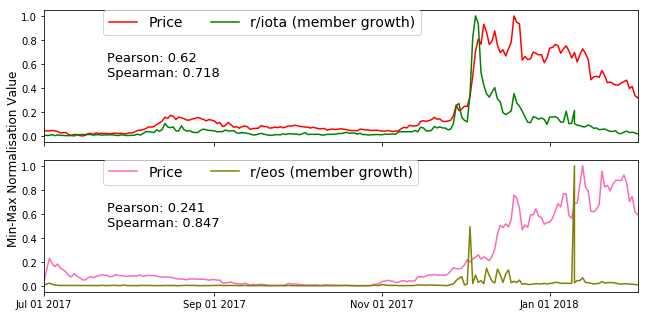

In [21]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 4.5))

for ax in [ax1, ax2]:
    ax.set_xticks([datetime.date(j,i,1) for i in range(1,13,2) for j in range(2017,2019)])

ax1.set_xticklabels([])
ax2.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') for i in range(1,13,2) for j in range(2017,2019)])
ax1.plot(iota_df['date'].astype(datetime.datetime),
         iota_df['close'], label='Price', color='r')
ax1.plot(iota_df['date'].astype(datetime.datetime),
         iota_df['subscriber_growth'], label='r/iota (member growth)', color='green')
ax2.plot(cardano_df['date'].astype(datetime.datetime),
         cardano_df['close'], label='Price', color='#FF69B4')
ax2.plot(cardano_df['date'].astype(datetime.datetime),
         cardano_df['subscriber_growth'], label='r/eos (member growth)', color='#808000')
for df,ax in zip([iota_df, cardano_df], [ax1, ax2]):
    ax.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
    ax.set_xlim([datetime.date(2017, 7, 1), datetime.date(2018, 2, 2)])
    ax.text(x=mdates.date2num(datetime.date(2017, 7, 24)), y=0.5, fontsize=13,
         s='Pearson: {}\nSpearman: {}'.format(
        round(df['close'].corr(df['subscriber_growth'],method='pearson'),3), 
        round(df['close'].corr(df['subscriber_growth'],method='spearman'),3)))
fig.text(0.005, 0.5, 'Min-Max Normalisation Value', va='center', rotation='vertical',fontsize=12)
plt.tight_layout()
plt.savefig("crypto_reddit_price.png")
plt.show()

There's clearly some correlation between price and subreddit member growth (the y-axis was normalised using the conventional min-max scaling). While the Spearman rank correlation is similarly high for both coins, the Pearson correlation coefficient is significantly stronger for iota, highlighting the importance of not relying on one single measure. 